In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r'C:\Users\aacjp\KC_Final.csv')

In [2]:
df.head()

,price,sqft_lot,waterfront,lat,has_basement,sqft_living,zip_density
0,221900.0,0.374187,0.0,0.5112,0,0.567220,0.661690
1,538000.0,0.479621,0.0,0.7210,1,1.235386,0.587569
2,180000.0,0.662278,0.0,0.7379,0,0.370135,0.955798
3,604000.0,0.331139,0.0,0.5208,1,0.942162,0.011237
4,510000.0,0.535120,0.0,0.6168,0,0.807567,2.937626


# Checking for Multicollinearity
we still have a little bit with area and lattitude, it is best to keep all values under 5, but it is worth the increased accuracy.

In [16]:
X = df.drop(['price'], axis='columns')

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

sqft_lot        1.175156
waterfront      1.003723
lat             6.546345
has_basement    1.680043
sqft_living     6.081259
zip_density     2.681569
dtype: float64

# Building a Linear Regression Model with Statsmodels

In [17]:
f = 'price~sqft_lot+waterfront+lat+has_basement+sqft_living+zip_density'

In [18]:
predictor = ols(formula=f, data=df).fit()

In [19]:
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     4650.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:42:18   Log-Likelihood:            -2.7213e+05
No. Observations:               20531   AIC:                         5.443e+05
Df Residuals:                   20524   BIC:                         5.443e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.133e+05   4668.143    -45.683      0.000   -2.22e+05   -2.04e+05
sqft_lot      2671.3972    369.733      7.225      0.000    1946.691    3396.103
waterfront    2.962e+05   1.87e+04     15.866      0.000     2.6e+05    3.33e+05
lat           6.347e+05   6981.285     90.916      0.000    6.21e+05    6.48e+05
has_basement   166.5879   2047.070      0.081      0.935   -3845.832    4179.008
sqft_living   3.467e+05   2644.468    131.098      0.000    3.42e+05    3.52e+05
zip_density   5485.8770   1266.592      4.331      0.000    3003.255    7968.499
==============================================================================
Omnibus:                     2018.176   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3306.054
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                       4.352   Cond. No.                         57.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

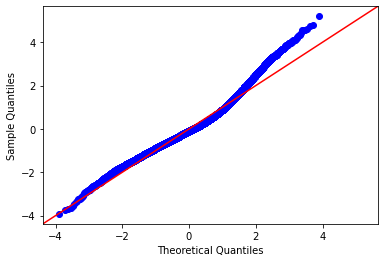

In [20]:
fig = sm.graphics.qqplot(predictor.resid, dist=stats.norm, line='45', fit=True)

In [21]:
x_cols = list(X.columns)

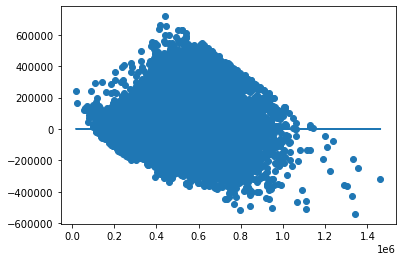

In [22]:
plt.scatter(predictor.predict(X[x_cols]), predictor.resid)
plt.plot(predictor.predict(X[x_cols]), [0 for i in range(len(X))]);

# Building Linear Regression Model with SKlearn

In [23]:
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
predicted = pd.DataFrame(model.predict(X_test))
actual = pd.DataFrame(list(y_test))
predicted.columns = ['Predicted Price']
actual.columns = ['Actual Price']
results = pd.concat([predicted, actual], axis='columns')

In [25]:
te = []
pe = []
for i in range(len(results)):
    if actual['Actual Price'][i] > predicted['Predicted Price'][i]:
        te.append(round(results['Actual Price'][i] - predicted['Predicted Price'][i], 2))
        pe.append(round(((results['Actual Price'][i] / predicted['Predicted Price'][i])-1)*100, 2))
    else:
        te.append(round(results['Predicted Price'][i] - results['Actual Price'][i], 2))
        pe.append(round(((results['Predicted Price'][i] / results['Actual Price'][i])-1)*100, 2))

In [26]:
results['% Error'] = pe
results['$ Error'] = te
results

,Predicted Price,Actual Price,% Error,$ Error
0,539711.527819,659500.0,22.19,119788.47
1,261132.657234,215000.0,21.46,46132.66
2,578183.447170,545000.0,6.09,33183.45
3,242483.121402,276200.0,13.90,33716.88
4,479846.614733,550000.0,14.62,70153.39
...,...,...,...,...
5128,648726.897095,645000.0,0.58,3726.90
5129,536919.378107,913888.0,70.21,376968.62
5130,361623.764638,291000.0,24.27,70623.76
5131,532888.490304,505000.0,5.52,27888.49


In [27]:
model.score(X_test, y_test)

0.5877322595700503

In [29]:
model.coef_

array([2.27335777e+03, 2.75752973e+05, 6.32520938e+05, 3.74912021e+02,
       3.46091065e+05, 6.30378953e+03])

In [30]:
model.intercept_

-211966.41444323014